## Paper - Figure

In [27]:
import pandas as pd
import numpy as np
import settings
import re
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 18})

In [28]:
MANUAL_DIR = settings.DATA_CONFIG['manual_dir']
MANUAL_VULN_FILE = MANUAL_DIR + 'vulnerability_manual.xlsx'
MANUAL_SHEET_NAME = 'manual'

In [29]:
def get_vuln_manual(filename, sheetname):
    return pd.read_excel(filename,sheet_name=sheetname)

In [30]:
df = get_vuln_manual(filename=MANUAL_VULN_FILE, sheetname=MANUAL_SHEET_NAME)

#### Figure 1: Trend of cybersecurity vulnerabilities in TensorFlow.

In [31]:
REGEX_VULN = '(?<=-)[^d]+(?=-)'

In [32]:
tf_df = df[ (df['Framework'] == 'tensorflow') & (df['Source'] == 'Official')]
tf_df = tf_df.reset_index(drop=True)
tf_df['Year'] = tf_df['CVE ID'].str.extract(f"({REGEX_VULN})", flags=re.IGNORECASE)[0].str.lower()
tf_df = tf_df[['CVE ID', 'Year']]

In [33]:
trend_s1 = tf_df['Year'].value_counts().sort_index()
trend_s1

2018      6
2019      2
2020     34
2021    201
2022    164
Name: Year, dtype: int64

In [34]:
def get_acc_trend(s):
    data = []
    acc = 0
    for i, v in s.items():
        acc += v
        data.append([i,acc])
    data = np.array(data)
    return pd.Series(data=data[:,1], index=data[:,0], dtype='int')
trend_s2 = get_acc_trend(trend_s1)
trend_s2

C:\Users\zhong\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\numeric.py:2378: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return bool(asarray(a1 == a2).all())


2018      6
2019      8
2020     42
2021    243
2022    407
dtype: int32

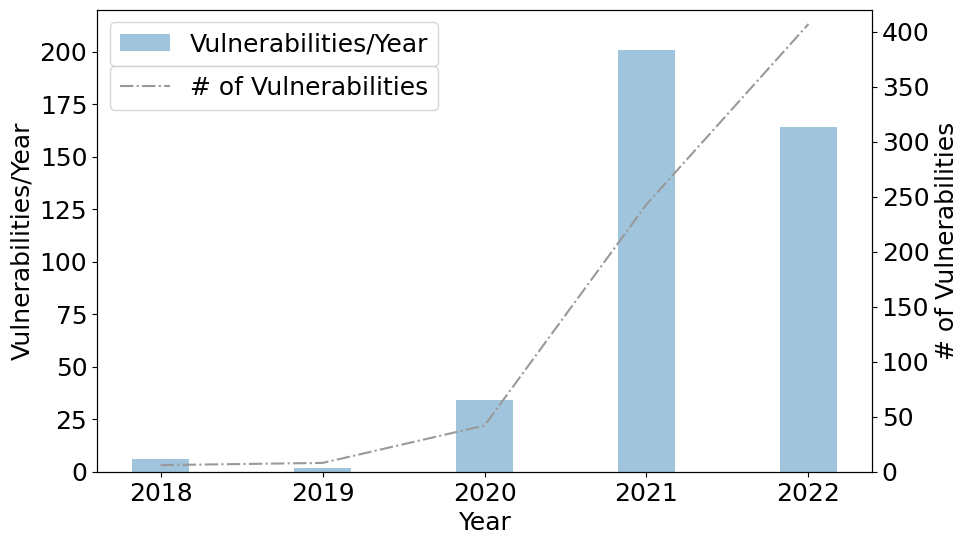

In [41]:
def plot_fig1(s1,s2):
    fig, ax1 = plt.subplots(figsize=(10,6))
    # axis
    X_LABEL = 'Year'
    Y1_LABEL = 'Vulnerabilities/Year'
    Y2_LABEL = '# of Vulnerabilities'
    # plot
    color = '#82B0D2'
    ax1.set_xlabel(X_LABEL)
    ax1.set_ylabel(Y1_LABEL)
    ax1.bar(s1.index, s1.values, color = color, label=Y1_LABEL, alpha=0.75, width=0.35)
    ax1.tick_params(axis ='y')
    # Adding Twin Axes to plot using dataset_2
    ax2 = ax1.twinx()
    color = '#999999'
    ax2.set_ylabel(Y2_LABEL)
    ax2.plot(s2.index, s2.values, color = color, label=Y2_LABEL, linestyle='-.')
    ax2.tick_params(axis ='y')
    # Add legend
    ax1.legend(loc='upper left')
    ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.905, 0, 0))
    # Add y lim
    ax1.set_ylim(0, 220)
    ax2.set_ylim(0, 420)
    # Show plot
    _ = plt.savefig('imgs/fig_trend_tf.pdf')
    plt.show()
                   
plot_fig1(s1=trend_s1, s2=trend_s2)